In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Classroom/')

Чтобы установить Scikit-Optimize, TPOT и PyCaret &mdash; раскомментируйте и выполните следующие ячейки:

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Using cached numpy-1.20.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

In [ ]:
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
salib 1.4.6.1 requires numpy>=1.20.3, but you have numpy 1.20.0 which is incompatible.
salib 1.4.6.1 requires scipy>=1.7.3, but you have scipy 1.5.4 which is incompatible.
fedot 0.6.0 requires scikit-learn>=1.0.0; python_version >= "3.8", but you have scikit-learn 0.23.2 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstan

In [ ]:
import numpy as np
import scipy, warnings, copy
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, KFold

%matplotlib inline 

In [ ]:
import tpot, skopt, pycaret

## **PyCaret**  
https://pycaret.org/  

PyCaret использует виджеты, поэтому необходимо включить режим совместимости с Google Colab

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
## загрузим данные
train = pd.read_csv('Xy_train.tab', sep='\t')
test = pd.read_csv('Xy_test.tab', sep='\t')

In [ ]:
## посмотрим, что это за набор
train.head()

,y,x26,x35,x59,x28,x11,x2,x34,x58,x40,...,x21,x19,x9,x39,x55,x3,x0,x53,x47,x44
0,1,4.229485,25.386394,18.745531,13.393458,-203.222427,173.960461,5.855219,91.432500,110.050645,...,64.948394,-96.957258,141.540681,141.785004,19.655015,16.888709,52.902278,-25.207036,27.675825,104.137304
1,1,93.469797,33.339729,10.039711,30.254786,59.467367,443.710378,31.445396,42.362146,142.575794,...,-18.290396,-481.255271,154.916675,87.109937,-9.392966,-55.337445,19.441125,13.810883,45.118832,95.934787
2,0,190.670891,-9.251730,10.713471,59.883406,335.197959,114.368160,25.321432,117.289045,-32.587038,...,251.374897,451.432977,-105.469959,196.064052,39.319945,-7.674848,96.989034,7.541378,39.586524,115.600407
3,1,-6.038395,11.072940,-0.922496,40.202344,155.688495,-293.865835,9.447841,11.924416,56.212133,...,139.062541,430.660282,16.787738,105.386054,-8.841910,55.997146,0.386415,1.561219,57.120496,180.231501
4,0,-0.110787,34.342132,22.346604,85.150801,47.634421,88.705150,-0.216896,10.644101,86.679262,...,166.350566,343.739000,37.174015,-34.875469,19.443504,4.923227,38.160152,17.970686,50.283743,187.378800


In [ ]:
train.y.value_counts()

1    1017
0     993
Name: y, dtype: int64

Кстати, я изначально запустил эту задачу как задачу регрессии. И получил любопытные результаты... Попробуйте сделать так же. И посмотрите на результаты. Какие методы сработали лучше всего? С чем это связано?  
Еще один вопрос: какие проблемы вы заметили с нашим решением? Что мы забыли сделать при решении нашей задачи?

In [ ]:
# from pycaret.regression import *
from pycaret.classification import *

exp_reg1 = setup(data=train, target='y', session_id=42)

,Description,Value
0,session_id,42
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2010, 61)"
5,Missing Values,False
6,Numeric Features,60
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
## catboost исключен из-за своей неспешности...
best = compare_models()#exclude = ['catboost'] )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1644,5.990000e-02,0.2441,7.578000e-01,0.1722,0.1642,0.838
et,Extra Trees Regressor,0.2046,6.560000e-02,0.2555,7.350000e-01,0.1826,0.2025,0.592
xgboost,Extreme Gradient Boosting,0.1734,6.820000e-02,0.2604,7.243000e-01,0.1832,0.1724,2.202
rf,Random Forest Regressor,0.1949,7.240000e-02,0.2686,7.074000e-01,0.1902,0.1903,3.017
gbr,Gradient Boosting Regressor,0.2386,9.150000e-02,0.3021,6.301000e-01,0.2131,0.2424,2.067
knn,K Neighbors Regressor,0.2229,1.090000e-01,0.3294,5.592000e-01,0.2316,0.2180,0.035
dt,Decision Tree Regressor,0.1586,1.586000e-01,0.3975,3.580000e-01,0.2756,0.1587,0.057
ada,AdaBoost Regressor,0.4120,1.784000e-01,0.4223,2.788000e-01,0.3001,0.4020,0.726
lasso,Lasso Regression,0.4180,2.063000e-01,0.4542,1.658000e-01,0.3200,0.4124,0.016
en,Elastic Net,0.4139,2.063000e-01,0.4542,1.656000e-01,0.3196,0.4088,0.019


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


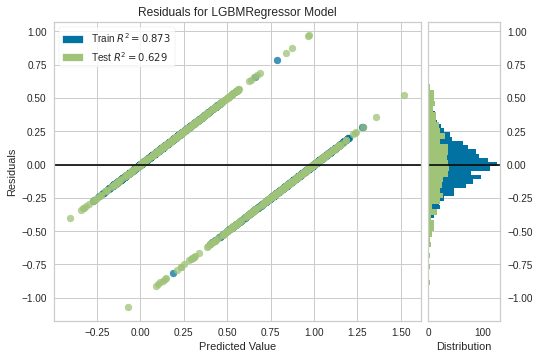

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9516,0.9869,0.9439,0.9605,0.9519,0.9032,0.9039,17.459
lightgbm,Light Gradient Boosting Machine,0.9474,0.9861,0.9355,0.9600,0.9475,0.8947,0.8953,0.723
qda,Quadratic Discriminant Analysis,0.9467,0.9848,0.9384,0.9570,0.9469,0.8933,0.8948,0.020
xgboost,Extreme Gradient Boosting,0.9395,0.9815,0.9341,0.9468,0.9401,0.8790,0.8797,1.028
rf,Random Forest Classifier,0.9090,0.9714,0.8893,0.9290,0.9083,0.8180,0.8195,0.577
gbc,Gradient Boosting Classifier,0.9047,0.9676,0.8852,0.9242,0.9040,0.8095,0.8105,1.771
et,Extra Trees Classifier,0.8997,0.9700,0.8838,0.9180,0.8998,0.7995,0.8015,0.283
knn,K Neighbors Classifier,0.8485,0.9236,0.8517,0.8512,0.8510,0.6970,0.6978,0.053
dt,Decision Tree Classifier,0.8478,0.8480,0.8334,0.8626,0.8475,0.6957,0.6964,0.061
ada,Ada Boost Classifier,0.7710,0.8608,0.7732,0.7763,0.7739,0.5420,0.5431,0.438


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7ff8e5477a90>
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
## создадим индивидуальную модель на основе lightgbm
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9932,0.9583,0.9583,0.9583,0.9149,0.9149
1,0.9220,0.9662,0.9167,0.9296,0.9231,0.8439,0.8440
2,0.9220,0.9833,0.9028,0.9420,0.9220,0.8440,0.8448
3,0.9716,0.9990,0.9861,0.9595,0.9726,0.9432,0.9436
4,0.9645,0.9905,0.9437,0.9853,0.9640,0.9291,0.9299
5,0.9574,0.9897,0.9437,0.9710,0.9571,0.9149,0.9153
6,0.9571,0.9839,0.9296,0.9851,0.9565,0.9143,0.9158
7,0.9286,0.9747,0.9014,0.9552,0.9275,0.8572,0.8586
8,0.9714,0.9955,0.9577,0.9855,0.9714,0.9429,0.9433


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
## оптимизация гиперпараметров
## кстати, какие параметры оптимизировать и в каком диапазоне
## вы, естественно, можете задать
tuned_lightgbm = tune_model(lightgbm)
print (tuned_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9433,0.9795,0.9583,0.9324,0.9452,0.8864,0.8868
1,0.8936,0.9452,0.8750,0.9130,0.8936,0.7873,0.7880
2,0.9362,0.9730,0.9306,0.9437,0.9371,0.8723,0.8724
3,0.9716,0.9964,0.9444,1.0000,0.9714,0.9433,0.9448
4,0.9362,0.9833,0.9296,0.9429,0.9362,0.8723,0.8724
5,0.9149,0.9767,0.8873,0.9403,0.9130,0.8298,0.8312
6,0.9214,0.9759,0.8732,0.9688,0.9185,0.8430,0.8473
7,0.9071,0.9694,0.9155,0.9028,0.9091,0.8142,0.8143
8,0.9643,0.9892,0.9577,0.9714,0.9645,0.9286,0.9287


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
## создадим индивидуальную модель на основе qda -- quadratic discriminant analysis
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9716,0.9950,0.9861,0.9595,0.9726,0.9432,0.9436
1,0.9645,0.9781,0.9861,0.9467,0.9660,0.9290,0.9298
2,0.9149,0.9841,0.9167,0.9167,0.9167,0.8297,0.8297
3,0.9362,0.9865,0.8750,1.0000,0.9333,0.8726,0.8798
4,0.9574,0.9903,0.9155,1.0000,0.9559,0.9149,0.9183
5,0.9220,0.9811,0.9437,0.9054,0.9241,0.8439,0.8447
6,0.9286,0.9837,0.9014,0.9552,0.9275,0.8572,0.8586
7,0.9500,0.9714,0.9577,0.9444,0.9510,0.9000,0.9001
8,0.9643,0.9929,0.9577,0.9714,0.9645,0.9286,0.9287


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 5
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
## ... и снова тюнинг...
tuned_qda = tune_model(qda)
## tune_model(dt, optimize = 'AUC')
print(tuned_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9929,0.9992,1.0000,0.9863,0.9931,0.9858,0.9859
1,0.9716,0.9803,0.9861,0.9595,0.9726,0.9432,0.9436
2,0.9645,0.9948,0.9583,0.9718,0.9650,0.9291,0.9292
3,0.9929,1.0000,0.9861,1.0000,0.9930,0.9858,0.9859
4,0.9787,0.9996,0.9718,0.9857,0.9787,0.9574,0.9575
5,0.9787,0.9988,0.9859,0.9722,0.9790,0.9574,0.9575
6,0.9857,0.9996,0.9859,0.9859,0.9859,0.9714,0.9714
7,0.9357,0.9778,0.9577,0.9189,0.9379,0.8713,0.8721
8,0.9714,0.9986,0.9859,0.9589,0.9722,0.9428,0.9432


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001)


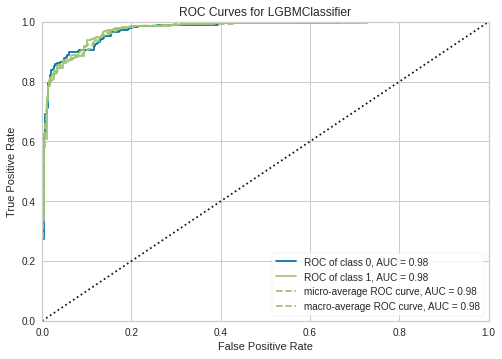

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
## по умолчанию для классификации выдается график ROC
## для регрессии -- график остатков (residuals)
plot_model(tuned_lightgbm)

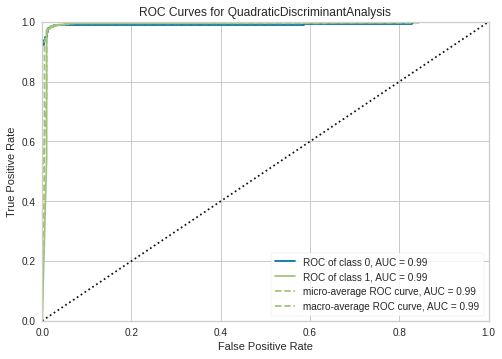

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_qda)

In [ ]:
## еще один важный момент, связанный с PyCaret
## когда мы создаем модель, изначально в обучении и подборе гиперпараметров используется
## опять же "тренировочный" набор -- 70-75% от исходного тренировочного набора
## метод predict_model выдает нам результат предсказания для "тестового" поднабора
predict_model(tuned_qda);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9818,0.9921,0.9868,0.9771,0.9819,0.9636,0.9636


In [ ]:
## а когда мы финализируем модель -- происходит ее обучение с выбранными
## оптимальными гиперпараметрами на всем тренировочном наборе
final_qda = finalize_model(tuned_qda)
predict_model(final_qda);

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:lo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9901,0.9926,0.9901,0.9901,0.9901,0.9801,0.9801


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)
predict_model(final_lightgbm);

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_sam

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9983,0.9996,1.0,0.9967,0.9984,0.9967,0.9967


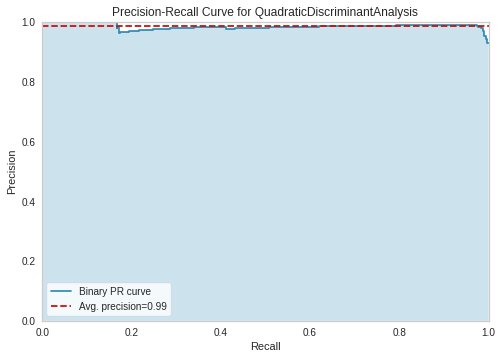

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
## график в координатах Precision-Recall
plot_model(tuned_qda, plot = 'pr')

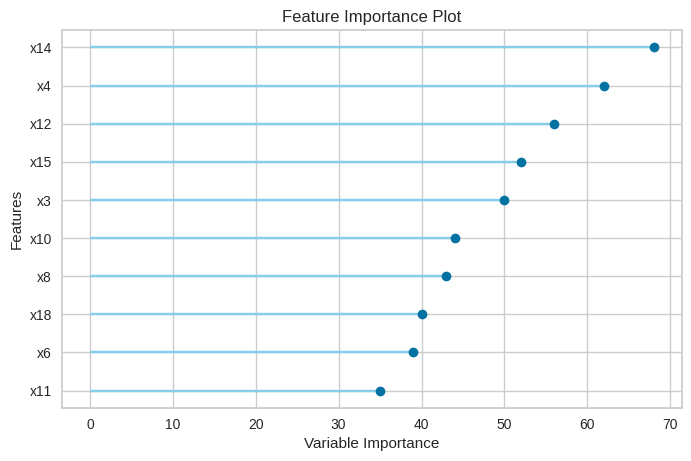

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
## важность признаков (топ-10 признаков)
plot_model(tuned_lightgbm, plot = 'feature')

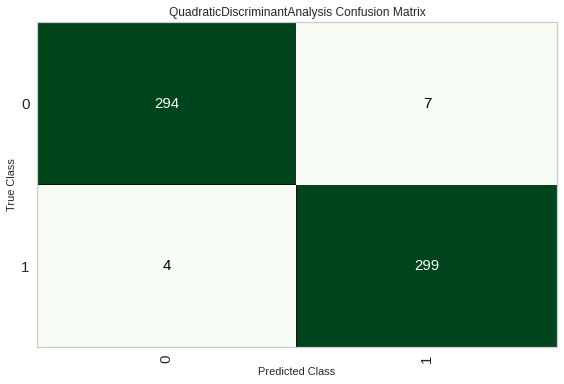

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plot_model(tuned_lightgbm, plot = 'confusion_matrix')
plot_model(tuned_qda, plot = 'confusion_matrix')

In [ ]:
## Очень классная вещь -- интерактивный анализ нашей модели
## Есть масса полезной информации и графиков
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
## делаем предсказание для нового набора, который мы с вами не использовали при обучении
## оптимизации и финализации модели
unseen_predictions = predict_model(final_qda, data=test);
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9758,0.9927,0.975,0.975,0.975,0.9515,0.9515


,y,x26,x35,x59,x28,x11,x2,x34,x58,x40,...,x9,x39,x55,x3,x0,x53,x47,x44,Label,Score
0,1,172.071025,5.982363,9.410858,51.252184,-339.536333,247.862101,-28.683091,139.422142,95.814891,...,41.567931,-53.382498,37.009103,-20.973509,-116.660946,52.580640,24.986423,151.532972,1,1.0
1,1,108.701386,8.748725,20.647433,74.131676,-189.112707,220.501022,4.585768,-60.785808,42.815462,...,93.090265,44.833352,48.459805,14.540943,-44.329422,71.870667,-6.185962,122.291936,1,1.0
2,1,41.077677,12.188840,-1.190366,15.668635,-187.899286,26.155826,18.480514,80.730751,110.063748,...,-5.590137,62.691081,13.806855,18.037743,263.280172,34.194979,41.504577,141.347512,1,1.0
3,0,32.077400,-4.373929,13.875252,70.802618,-249.517311,6.531140,14.252674,132.048495,136.550164,...,-183.145124,-37.315911,44.974744,77.707822,-171.503756,48.801765,21.394133,141.258226,0,1.0
4,0,79.513051,7.216044,15.763907,39.963391,355.613474,-25.807282,24.506626,74.889149,-6.537882,...,-196.720656,46.948300,23.441894,-17.780510,215.626134,49.637027,44.969183,121.178967,0,1.0


In [ ]:
from pycaret.utils import check_metric

(check_metric(unseen_predictions.y, unseen_predictions.Label, 'Accuracy'),
    check_metric(unseen_predictions.y, unseen_predictions.Label, 'F1'),
 check_metric(unseen_predictions.y, unseen_predictions.Label, 'Kappa'))

(0.9758, 0.975, 0.9515)

In [ ]:
unseen_predictions_ = predict_model(final_lightgbm, data=test);
unseen_predictions_.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9192,0.9727,0.8979,0.9329,0.9151,0.8381,0.8386


,y,x26,x35,x59,x28,x11,x2,x34,x58,x40,...,x9,x39,x55,x3,x0,x53,x47,x44,Label,Score
0,1,172.071025,5.982363,9.410858,51.252184,-339.536333,247.862101,-28.683091,139.422142,95.814891,...,41.567931,-53.382498,37.009103,-20.973509,-116.660946,52.580640,24.986423,151.532972,1,0.9908
1,1,108.701386,8.748725,20.647433,74.131676,-189.112707,220.501022,4.585768,-60.785808,42.815462,...,93.090265,44.833352,48.459805,14.540943,-44.329422,71.870667,-6.185962,122.291936,1,0.9689
2,1,41.077677,12.188840,-1.190366,15.668635,-187.899286,26.155826,18.480514,80.730751,110.063748,...,-5.590137,62.691081,13.806855,18.037743,263.280172,34.194979,41.504577,141.347512,1,0.9828
3,0,32.077400,-4.373929,13.875252,70.802618,-249.517311,6.531140,14.252674,132.048495,136.550164,...,-183.145124,-37.315911,44.974744,77.707822,-171.503756,48.801765,21.394133,141.258226,0,0.9786
4,0,79.513051,7.216044,15.763907,39.963391,355.613474,-25.807282,24.506626,74.889149,-6.537882,...,-196.720656,46.948300,23.441894,-17.780510,215.626134,49.637027,44.969183,121.178967,0,0.9464


In [ ]:
from pycaret.utils import check_metric

(check_metric(unseen_predictions_.y, unseen_predictions_.Label, 'Accuracy'),
    check_metric(unseen_predictions_.y, unseen_predictions_.Label, 'F1'),
 check_metric(unseen_predictions_.y, unseen_predictions_.Label, 'Kappa'))

(0.9192, 0.9151, 0.8381)

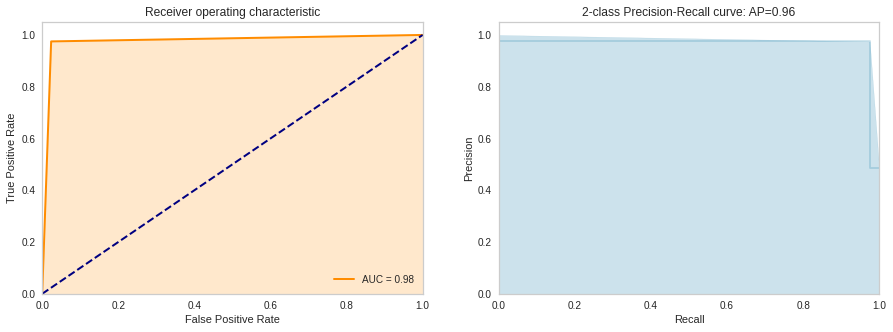

In [ ]:
roc_auc = metrics.roc_auc_score(y_score=unseen_predictions.Label, y_true=unseen_predictions.y)
fpr, tpr, thresholds = metrics.roc_curve(unseen_predictions.y, unseen_predictions.Label)

_, axs = plt.subplots(ncols = 2, figsize = (15, 5))
sns.lineplot(fpr, tpr, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc, ax=axs[0])
axs[0].fill_between(fpr, tpr, alpha=0.2, color='darkorange')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0]); axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate'); axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic')
axs[0].legend(loc="lower right")
axs[0].grid()

precision, recall, _ = metrics.precision_recall_curve(unseen_predictions.y, unseen_predictions.Label)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
average_precision = metrics.average_precision_score(unseen_predictions.y, unseen_predictions.Label)
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0]);plt.grid()
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

In [ ]:
## кстати, вы легко можете сохранить нужную модель и потом ее загрузить и снова использовать
save_model(final_qda,'Finalized QDA Model 30Apr2021.pcl')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.14,
                              store_covariance=False, tol=0.0001), model_name=Finalized QDA Model 30Apr2021.pcl, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('cluster_all', 'passthrough'), ('dummy', Dummify(target='y')),
                 ('fix_perfect', Remove_100(target='y')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough')

In [ ]:
## загрузим нашу модель
## это, кстати, тоже целый пайплайн -- можете заглянуть под капот и убедиться
final_qda = load_model('Finalized QDA Model 30Apr2021.pcl')
new_prediction = predict_model(final_qda, data=test)

Transformation Pipeline and Model Successfully Loaded


https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb  
https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb   
  
https://github.com/pycaret/pycaret/tree/master/tutorials  


## **TPOT**  
http://epistasislab.github.io/tpot/  
TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.  
  
http://epistasislab.github.io/tpot/using/  

In [ ]:
from tpot import TPOTClassifier

In [ ]:
pipeline_optimizer = TPOTClassifier()

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=3, population_size=10, cv=3,
                                    random_state=42, verbosity=2)

In [ ]:
X_train, y_train = train.drop('y', axis = 1), train.y
pipeline_optimizer.fit(X_train, y_train)


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9388059701492537

Generation 2 - Current best internal CV score: 0.9388059701492537

Generation 3 - Current best internal CV score: 0.9388059701492537

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.0001, learning_rate_init=0.01)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=3,
               disable_update_check=False, early_stop=None, generations=3,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=10,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
X_test, y_test = test.drop('y', axis = 1), test.y
print(f"{pipeline_optimizer.score(X_test, y_test):.2f}")

0.93


In [ ]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [ ]:
tpot_config = {
    'sklearn.naive_bayes.GaussianNB': {
    },

    'sklearn.naive_bayes.BernoulliNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },

    'sklearn.naive_bayes.MultinomialNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    }
}

Пример подробного конфига для эксперимента  
Естественно, для получения осмысленных результатов вам понадобится довольно много времени...  
https://github.com/EpistasisLab/tpot/blob/master/tpot/config/classifier.py

http://epistasislab.github.io/tpot/using

## **Scikit-Optimize**  
https://scikit-optimize.github.io/stable/index.html  
https://scikit-optimize.github.io/stable/auto_examples/index.html  

In [ ]:
!pip install fedot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 472 kB 5.0 MB/s 
     |████████████████████████████████| 4.7 MB 44.2 MB/s 
     |████████████████████████████████| 758 kB 43.0 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 280 kB 57.2 MB/s 
     |████████████████████████████████| 76.6 MB 20 kB/s 
     |████████████████████████████████| 1.6 MB 47.7 MB/s 
     |████████████████████████████████| 9.4 MB 7.3 MB/s 
     |████████████████████████████████| 41 kB 430 kB/s 
     |████████████████████████████████| 316 kB 42.6 MB/s 
     |████████████████████████████████| 9.7 MB 38.9 MB/s 
     |████████████████████████████████| 98 kB 4.2 MB/s 
     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 200 kB 53.3 MB/s 
     |████████████████████████████████| 40 kB 3.7 MB/s 
     |████████████████████████████████| 295 

In [ ]:
from fedot.api.main import Fedot

ImportError: ignored

In [ ]:
X_train, y_train = train.drop('y', axis = 1), train.y
X_test, y_test = test.drop('y', axis = 1), test.y

In [ ]:
model = Fedot(problem='classification', timeout=5, preset='best_quality', n_jobs=-1)
model.fit(features=X_train, target=y_train)

CRITICAL:root:ApiComposer - Initial pipeline was fitted in 1.4 sec.


2022-12-09 07:21:53,743 - ApiComposer - Initial pipeline was fitted in 1.4 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: True Time limit: 5 min Set of candidate models: ['resample', 'rf', 'pca', 'dt', 'normalization', 'fast_ica', 'mlp', 'qda', 'logit', 'bernb', 'scaling', 'knn', 'isolation_forest_class', 'poly_features', 'lgbm']


2022-12-09 07:21:53,756 - ApiComposer - AutoML configured. Parameters tuning: True Time limit: 5 min Set of candidate models: ['resample', 'rf', 'pca', 'dt', 'normalization', 'fast_ica', 'mlp', 'qda', 'logit', 'bernb', 'scaling', 'knn', 'isolation_forest_class', 'poly_features', 'lgbm']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-12-09 07:21:53,782 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]CRITICAL:root:GroupedCondition - Optimisation stopped: Time limit is reached


2022-12-09 07:24:47,513 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [02:53<?, ?gen/s]
CRITICAL:root:ApiComposer - Hyperparameters tuning started with 2 min. timeout


2022-12-09 07:24:47,525 - ApiComposer - Hyperparameters tuning started with 2 min. timeout
  0%|          | 9/100000 [02:05<387:03:26, 13.94s/trial, best loss: -0.9860240000000001]


CRITICAL:root:ApiComposer - Hyperparameters tuning finished


2022-12-09 07:27:19,179 - ApiComposer - Hyperparameters tuning finished


CRITICAL:root:ApiComposer - Model generation finished


2022-12-09 07:27:19,542 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-12-09 07:27:19,565 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [mlp, scaling]}


2022-12-09 07:27:19,575 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [mlp, scaling]}


{'depth': 2, 'length': 2, 'nodes': [mlp, scaling]}

In [ ]:
prediction = model.predict(features=X_test)

In [ ]:
metrics = model.get_metrics(target=y_test, metric_names=("acc", "roc_auc", "f1", ))
metrics

{'acc': 0.9353535353535354, 'roc_auc': 0.984, 'f1': 0.9353535353535354}

В задании 2 набора данных (третий у меня -- для проверки ваших решений). Решаем задачу регрессии. Целевая переменная Y. В данных присутствует довольно много проблем -- шум, лишние переменные и т.п. Нужно провести разведочный анализ данных и построить решение. Обратите внимание на целевую переменную. Решение принимаю в виде готовой модели, которую можно загрузить в среду и использовать. Присылайте ноутбук с ходом вашего решения. Использовать можно все что угодно -- scikit-klearn, TPOT, PyCaret. Метрики -- MSE (sklearn.metrics.mean_squared_error) и R2 ( sklearn.metrics.r2_score).